In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/My Drive/Credit Risk Visulization Task/datasets_credit_labelled.csv",index_col=0)
data.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
502,49,male,2,own,moderate,rich,1126,9,radio/TV,good
766,31,male,1,own,little,little,3108,30,furniture/equipment,bad
107,32,male,2,own,little,moderate,6078,12,car,good
373,63,male,3,free,NaN,NaN,13756,60,car,good
207,26,male,2,own,little,moderate,1424,12,domestic appliances,good


# Analysis Distribution of Risk

## E.g. Age Group [18-25):Student, [25,35):Yonge, [35,60):Adult, [60, ): Senior]

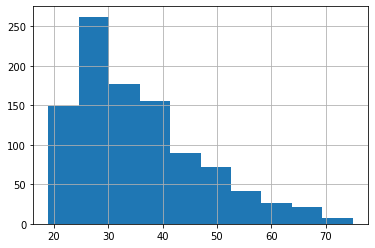

In [4]:
df_bin = data.copy()

# Overall age distribution
df_bin['Age'].hist()

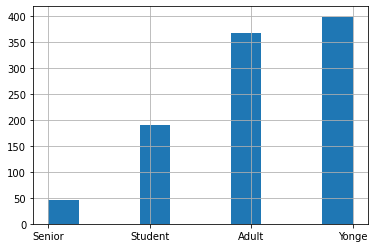

In [5]:
#Set bins and corresponding labels
Bins = [18, 25, 35, 60, 100]
Labels = ['Student','Yonge','Adult','Senior']

df_bin["Age"] = pd.cut(data["Age"], bins=Bins, labels=Labels, include_lowest=True)
df_bin.rename(columns = {"Age":'Age Group'},inplace=True)

# Overall distribution
df_bin["Age Group"].hist()

## For Job: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

Use charts to visulize
1. Age Group to Risk 
2. Gender to Risk
3. Housing to Risk
4. Job to Risk
5. Saving Accounts to Risk
6. Credit Amount to Housing
7. Job to Credit Amount
8. Age to Credit Amount
9. Any other things that revelent to analysis the relations between any of the columns
10. Correlation between them

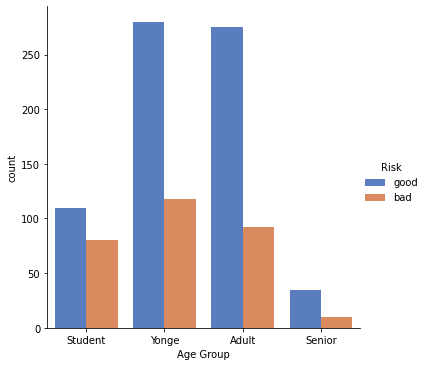

In [6]:
# 1. Age Group to Risk 
g1 = sns.catplot(x="Age Group", kind="count", hue="Risk", data=df_bin, palette="muted")

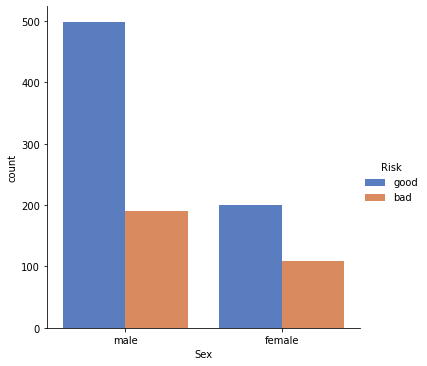

In [7]:
# 2. Gender to Risk
g2 = sns.catplot(x="Sex", kind="count", hue="Risk", data=df_bin, palette="muted")

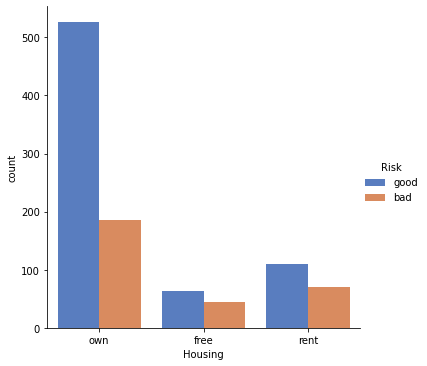

In [8]:
# 3. Housing to Risk
g3 = sns.catplot(x="Housing", kind="count", hue="Risk", data=df_bin, palette="muted")

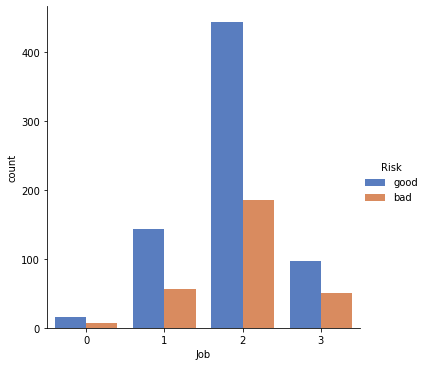

In [9]:
#4. Job to Risk
g4 = sns.catplot(x="Job", kind="count", hue="Risk", data=df_bin, palette="muted")

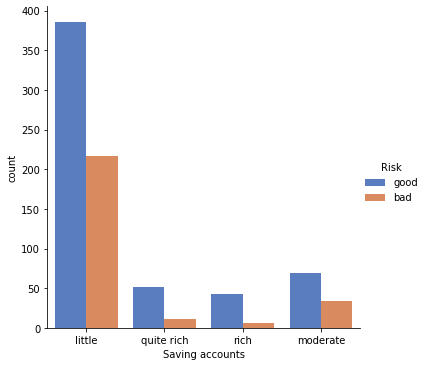

In [10]:
# 5. Saving Accounts to Risk
g5 = sns.catplot(x="Saving accounts", kind="count", hue="Risk", data=df_bin, palette="muted")

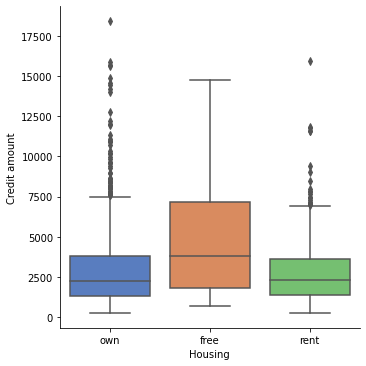

In [11]:
# 6. Credit Amount to Housing
g6 = sns.catplot(x="Housing", y="Credit amount", kind="box", data=df_bin, palette="muted")

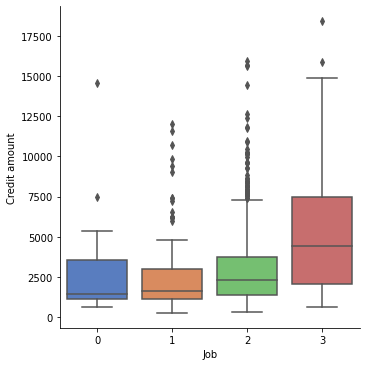

In [12]:
# 7. Job to Credit Amount
g7 = sns.catplot(x="Job", y="Credit amount", kind="box", data=df_bin, palette="muted")

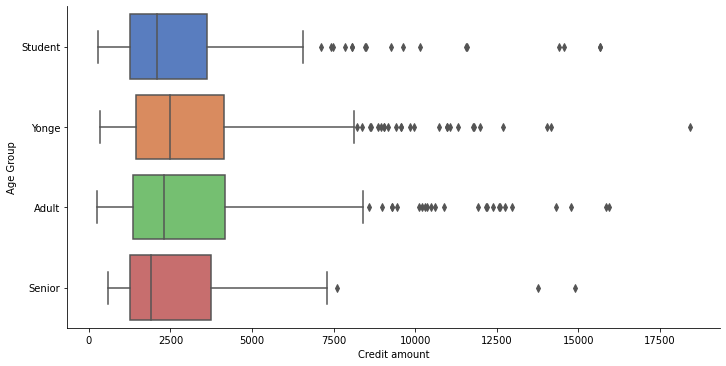

In [13]:
# 8. Age to Credit Amount
g8 = sns.catplot(x="Credit amount", y="Age Group", kind="box", data=df_bin, palette="muted", height=5, aspect=2)

#### Any other things that revelent to analysis the relations between any of the columns

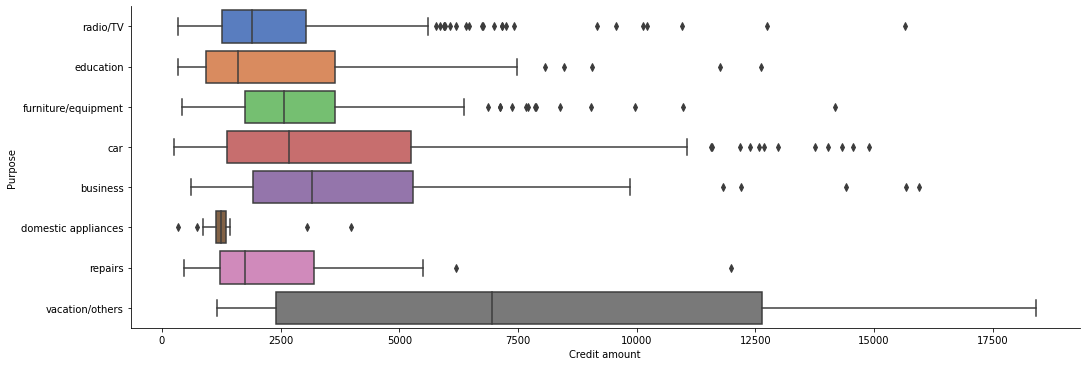

In [14]:
# Credit amount to Purpose
g8 = sns.catplot(x="Credit amount", y="Purpose", kind="box", data=df_bin, palette="muted", height=5, aspect=3)

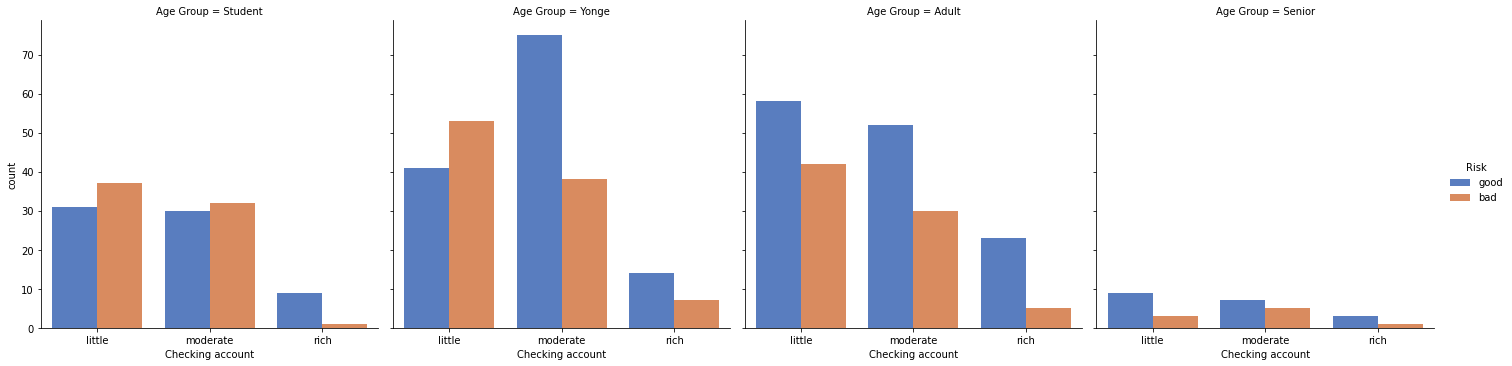

In [15]:
# Checking account to Risk
sns.catplot(x="Checking account", hue="Risk", col="Age Group", kind="count", data=df_bin, palette="muted")

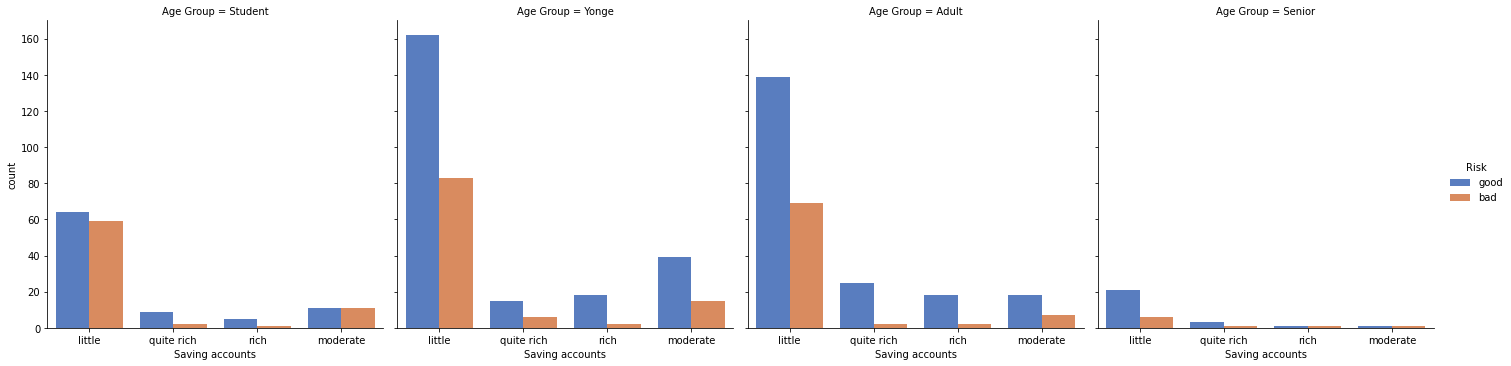

In [16]:
# Saving accounts to Risk
sns.catplot(x="Saving accounts", hue="Risk", col="Age Group", kind="count", data=df_bin, palette="muted")

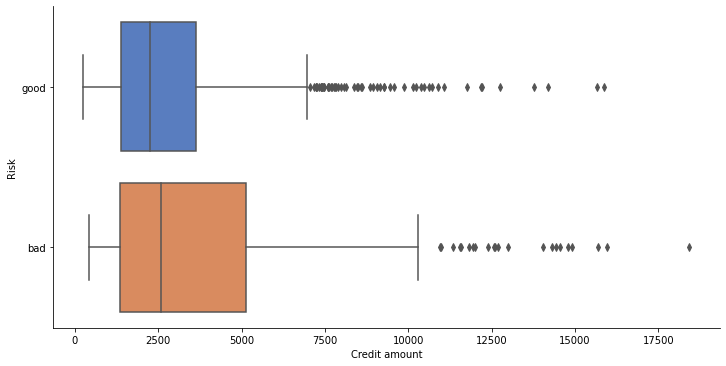

In [17]:
# Credit amount to Risk
sns.catplot(x="Credit amount", y="Risk", kind="box", data=df_bin, palette="muted", height=5, aspect=2)

#### Correlation between them

In [18]:
# Any NaN?
df_cor = data.copy()
df_cor.isnull().values.sum()

577

In [19]:
df_cor = df_cor.fillna(0)

In [20]:
# Check
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [21]:
# one-hot encoding 
df_cor = pd.get_dummies(df_cor)

In [22]:
df_cor.sample(5)

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_0,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_0,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
589,60,2,2246,12,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
882,36,2,2181,30,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
23,44,2,1804,12,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
956,49,1,3656,30,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
169,31,2,1935,24,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


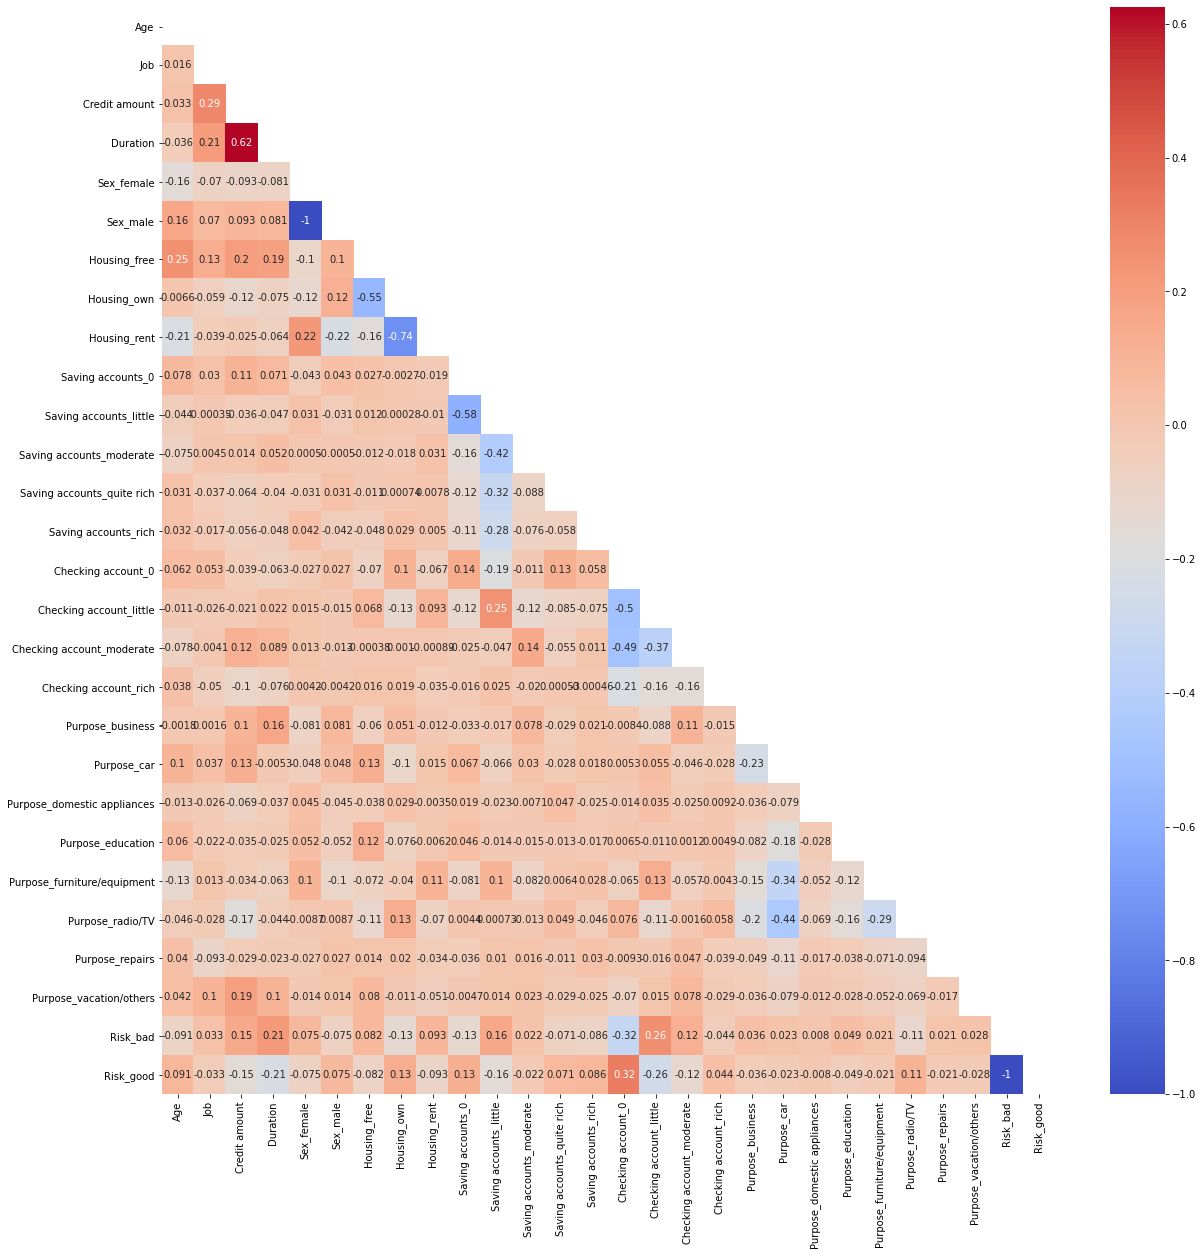

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
matrix = np.triu(df_cor.corr())
sns.heatmap(df_cor.corr(), cmap= 'coolwarm', annot=True, mask=matrix)